# When In January 2018 Were the Most Right Whales Definitely Sighted?

*Setup*

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('Sources/23305_RWSAS.csv')
print(df.shape)
df.head()

(13200, 9)


,Id,SIGHTINGDATE,GROUPSIZE,LAT,LON,CERTAINTY,CATEGORY,MOM_CALF,DUPLICATE
0,29961,27-Jan-18,1.0,41.90,-70.40,Definite,US Coast Guard,No,NaN
1,29941,26-Jan-18,3.0,36.56,-74.89,Definite,Dedicated Eg Aerial,No,NaN
2,29923,23-Jan-18,4.0,36.55,-74.35,Definite,Opportunistic,No,NaN
3,29902,24-Jan-18,2.0,41.81,-69.89,Definite,Opportunistic,No,NaN
4,29893,22-Jan-18,1.0,26.05,-81.81,Definite,Opportunistic,No,NaN


*Data Wrangling*

In [2]:
# create a new data frame
df2 = df.copy()

# remove the duplicate sighting dates
df2 = df2.drop_duplicates(subset="SIGHTINGDATE")

# add a leading zero to the days of the sighting dates where appropriate (where the length is less than 9)
df2["SIGHTINGDATE"] = df2["SIGHTINGDATE"].str.rjust(9, "0")

# format sighting date as a date
df2["SIGHTINGDATE"] = pd.to_datetime(df2["SIGHTINGDATE"], format="%d-%b-%y")

# create a column that has the counts of each sighting date
df2["SIGHTINGCOUNT"] = df["SIGHTINGDATE"].map(df["SIGHTINGDATE"].value_counts())

# create a column that has the sum of group sizes for each sighting date
df2["TOTALGROUPSIZE"] = df["SIGHTINGDATE"].map(df.groupby('SIGHTINGDATE')['GROUPSIZE'].sum())

# sort the data frame by sighting date so dates will appear in order in the chart
df2.sort_values("SIGHTINGDATE", ascending=True, inplace=True)

# confirm changes
df2.info()
df2.head()

<class 'pandas.core.frame.DataFrame'>
Index: 2708 entries, 13198 to 0
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Id              2708 non-null   int64         
 1   SIGHTINGDATE    2708 non-null   datetime64[ns]
 2   GROUPSIZE       2570 non-null   float64       
 3   LAT             2578 non-null   float64       
 4   LON             2576 non-null   float64       
 5   CERTAINTY       2708 non-null   object        
 6   CATEGORY        2708 non-null   object        
 7   MOM_CALF        2708 non-null   object        
 8   DUPLICATE       87 non-null     float64       
 9   SIGHTINGCOUNT   2708 non-null   int64         
 10  TOTALGROUPSIZE  2708 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2), object(3)
memory usage: 253.9+ KB


,Id,SIGHTINGDATE,GROUPSIZE,LAT,LON,CERTAINTY,CATEGORY,MOM_CALF,DUPLICATE,SIGHTINGCOUNT,TOTALGROUPSIZE
13198,8300,2002-02-06,3.0,41.93,-70.52,Definite,Opportunistic,No,NaN,1,3.0
13194,8304,2002-02-07,1.0,41.88,-70.28,Definite,Dedicated Eg Aerial,No,NaN,4,4.0
13193,8305,2002-02-14,2.0,41.84,-70.24,Definite,Dedicated Eg Aerial,No,NaN,1,2.0
13192,8307,2002-02-17,3.0,41.93,-70.13,Definite,Dedicated Eg Shipboard,No,NaN,1,3.0
13191,8308,2002-02-22,2.0,41.93,-70.26,Definite,Dedicated Eg Aerial,No,NaN,1,2.0


*Visualization*

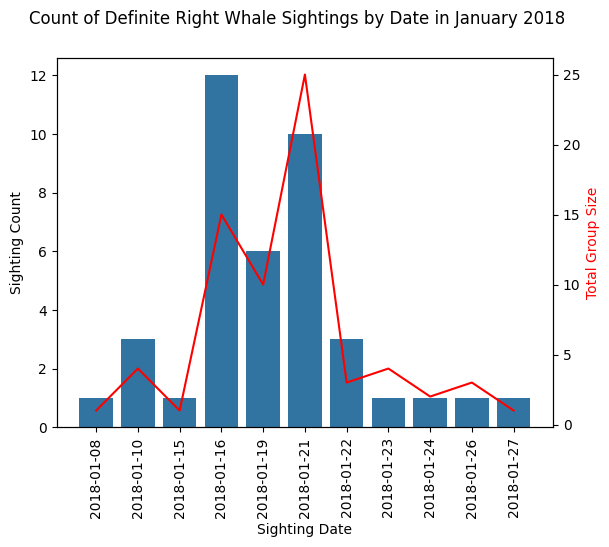

In [7]:
# create new dataframe
y2018 = df2.copy()

# filter dataframe by 2018 (which only has data for January) and by a certainty of Definite
y2018 = y2018[(y2018["SIGHTINGDATE"].dt.year == 2018) & (y2018["CERTAINTY"] == "Definite")]

# convert sighting date to a string so we don't have timezone related errors when we try to create the chart
y2018["SIGHTINGDATE"] = y2018["SIGHTINGDATE"].astype(str)

# create the bar chart combined with the line chart
fig, ax = plt.subplots()
ax2 = ax.twinx()
sns.barplot(data=y2018, x="SIGHTINGDATE", y="SIGHTINGCOUNT", ax = ax)
sns.lineplot(data=y2018, x="SIGHTINGDATE", y="TOTALGROUPSIZE", ax = ax2, color="red")

# customize the chart
fig.suptitle("Count of Definite Right Whale Sightings by Date in January 2018")
plt.xlabel("Sighting Date")
ax.set_ylabel("Sighting Count")
ax2.set_ylabel("Total Group Size")
ax.set_xlabel("Sighting Date")
ax.tick_params("x", labelrotation=90)
ax2.yaxis.label.set_color("red")

plt.show()

Here we can see that the most whales were sighted on the 22nd, even though there were more whale sightings on the 19th.  This is because the group size was larger on the 22nd.